## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_data,results, on="Mouse ID", how='outer')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].count()

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
print(duplicate_mice[0])

g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df.loc[combined_df["Mouse ID"]=="g989",:]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID',"Timepoint"],keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1888

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
groupby_drug =combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_mean = round(groupby_drug.mean(),2)
drug_median = round(groupby_drug.median(),2)
drug_variance = round(groupby_drug.var(),2)
drug_std = round(groupby_drug.std(),2)
drug_sems = round(groupby_drug.sem(),2)

summary_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,"Median Tumor Volume":drug_median,
                           "Variance Tumor Volume":drug_variance,"Std Tumor Volume":drug_std, "SEM Tumor Volume ":drug_sems})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggreg = round(clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}),2)
summary_aggreg

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

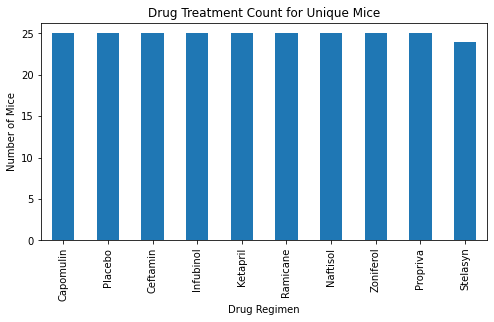

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas. 
unique_df = clean_df.drop_duplicates(("Mouse ID"),keep="first")
drug_data = unique_df["Drug Regimen"].value_counts()
drug_data.plot(kind="bar",title='Drug Treatment Count for Unique Mice',figsize=(8,4))
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

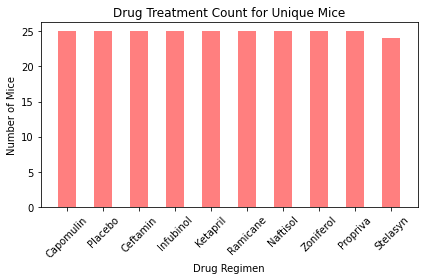

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_data))
ticks = [value for value in x_axis]
plt.bar(x_axis, drug_data,align="center",color="r",alpha=0.5,width=0.5)
plt.xticks(ticks, drug_data.index,rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title('Drug Treatment Count for Unique Mice')
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

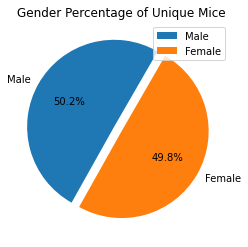

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_df = clean_df.drop_duplicates(("Mouse ID"),keep="first")
gender_data = unique_df["Sex"].value_counts()
gender_data.plot(kind="pie",y="Mouse ID",autopct="%1.1f%%",startangle=60, title = "Gender Percentage of Unique Mice",legend=True,explode=[0.1,0])
plt.ylabel("")

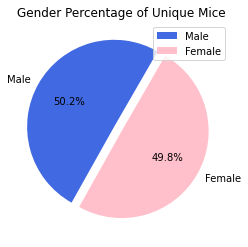

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["royalblue","pink"]
explode = [0.1,0]
plt.pie(gender_data,autopct="%1.1f%%",startangle=60,colors=colors, labels=["Male","Female"],explode=explode)
plt.legend(loc="best")
plt.title("Gender Percentage of Unique Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(max_timepoint,clean_df, on=["Timepoint","Mouse ID"],how="inner")
merge_df.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    drug_df = merge_df.loc[:,"Drug Regimen"] == drug
    tumor_vol_data = merge_df.loc[drug_df,"Tumor Volume (mm3)"]
    tumor_vol.append(tumor_vol_data)
    quartiles = tumor_vol_data.quantile([0.25,0.75])
    first_q = quartiles[0.25]
    third_q = quartiles[0.75]
    iqr = third_q - first_q
    lower_b = round(first_q - (1.5*iqr),2)
    upper_b = round(third_q +(1.5*iqr),2)
    
# Determine outliers using upper and lower bounds
    outlier=(tumor_vol_data>upper_b)|(tumor_vol_data<lower_b)
    outlier_count=len(tumor_vol_data.loc[outlier])
    print(f"{drug} has a lower bound of {lower_b} and an upper bound of {upper_b}")
    print(f"{drug} has {outlier_count} outliers")

Capomulin has a lower bound of 20.7 and an upper bound of 51.83
Capomulin has 0 outliers
Ramicane has a lower bound of 17.91 and an upper bound of 54.31
Ramicane has 0 outliers
Infubinol has a lower bound of 36.83 and an upper bound of 82.74
Infubinol has 1 outliers
Ceftamin has a lower bound of 25.36 and an upper bound of 87.67
Ceftamin has 0 outliers


Text(0.5, 1.0, 'Final Tumor Volume')

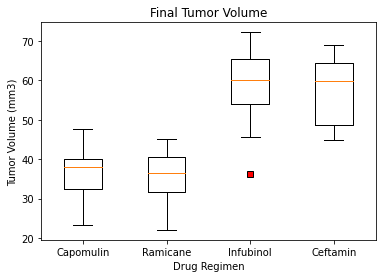

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig,ax = plt.subplots()
outlier_marker = dict(markerfacecolor='r', marker='s')
ax.boxplot(tumor_vol,flierprops=outlier_marker)
x_axis = np.arange(len(drug_list))
ticks = [value+1 for value in x_axis]
plt.xticks(ticks,drug_list)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Final Tumor Volume")

## Line and Scatter Plots

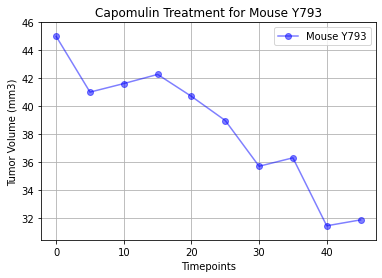

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df= clean_df.loc[clean_df["Drug Regimen"]=='Capomulin',:]
capo_df["Mouse ID"].value_counts()
capo_mouse = capo_df.loc[capo_df["Mouse ID"]=="y793",:]
x_axis = capo_mouse["Timepoint"]
y_axis= capo_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis,label="Mouse Y793",color="blue",alpha=0.5,marker='o')
plt.grid()
plt.legend(loc="best")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse Y793")
plt.ylim(min(y_axis)-1,max(y_axis)+1)
plt.show()

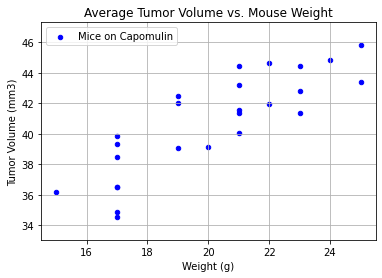

In [91]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_df = capo_df.groupby("Mouse ID").mean()
avg_df.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)", title ="Average Tumor Volume vs. Mouse Weight",grid=True,label="Mice on Capomulin",color="b")
plt.legend(loc="best")
plt.ylim(min(avg_df["Tumor Volume (mm3)"])-1.5,max(avg_df["Tumor Volume (mm3)"])+1.5)
plt.show()


## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cc = round(sts.pearsonr(avg_df['Weight (g)'],avg_df["Tumor Volume (mm3)"])[0],2)
print(f'The correlation coefficent for mouse weight and average tumor volume is {cc}')

The correlation coefficent for mouse weight and average tumor volume is 0.84


In [93]:
slope,intercept,rvalue,pvalue,sems = linregress(avg_df['Weight (g)'],avg_df["Tumor Volume (mm3)"])

In [94]:
regress_values = slope*(avg_df['Weight (g)']) + intercept

In [95]:
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(eq)

y = 0.95x + 21.55


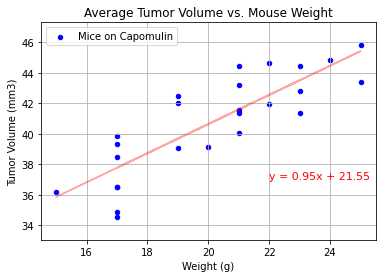

In [96]:
avg_df.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)", title ="Average Tumor Volume vs. Mouse Weight",grid=True,label="Mice on Capomulin",color="b")
plt.plot(avg_df['Weight (g)'],regress_values,color="r",alpha = 0.35)
plt.legend(loc="best")
plt.annotate(eq,xy=(22, 37),fontsize=11,color="r")
plt.ylim(min(avg_df["Tumor Volume (mm3)"])-1.5,max(avg_df["Tumor Volume (mm3)"])+1.5)

plt.show()